## Task 1: Data Collection and Cleaning ##

## Six-Step Inference Process to your topic:

Step	Explanation (for your project)
1. What is the question of interest?	
<br>Did recent US-China tariffs cause phone/electronic prices to go up?
2. What population is associated with the question?
<br>All imported/exported electronic devices between US, China, and other countries (especially under Chapter 85 from WTO data).
4. Take a sample from the population
<br>Use available WTO tariff/export data (like the Excel file you have) focused on Chapter 85 (electronics).
6. Measure one or more variables in each unit
<br>Measure: tariff rate, export/import value, and maybe price if available.
8. Make a summary of all sample data
<br>Use Python to summarize average tariff rate, import/export volume over time.
10. Make inference from the sample	Conclude if the tariff increase is linked to trade volume drops or price increases.

## Column Name	Explanation
**importer**: The country that is buying or bringing in the electronic items (like phones 📱)<br>
**year**: The year this information was recorded — like 2023, 2024, etc. 📅<br>
**value_usd**: How much money 💵 was spent to buy these electronics, counted in US dollars ($).<br>
**mfn_avg_duty**: This is the average tax (in %) the country usually charges for everyone (called MFN = Most Favored Nation). Think of it like a regular price of tax. 💸<br>
**best_avg_duty**: This is the lowest tax the country gives to special trade partners (like a discount for friends). 🛍️<br>
**mfn_line_count**: The number of different types of products that have the regular (MFN) tax. Think of it like how many kinds of electronics are being taxed. 📦📱🖥️<br>
**mfn_nonadval_line**: This is how many products get a special kind of tax — not based on price, but maybe on weight or quantity (called non-ad valorem tax). ⚖️<br>
**pref_line_count**: The number of product types that get friendly discount tax (special deals). 🎁<br>
**pref_nonadval_line**: Like above, but for those friendly deals that use a non-standard tax (not based on value). 📊<br>

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Data/Dataset-1-US-China.csv")
df

,importer,year,value_usd,mfn_avg_duty,best_avg_duty,mfn_line_count,mfn_nonadval_line,pref_line_count,exporter
0,ALL Available Markets,NaN,3.462413e+09,NaN,NaN,NaN,NaN,NaN,US
1,Albania,2025.0,NaN,2.46,2.46,490,NaN,NaN,US
2,Angola,2023.0,NaN,5.84,5.84,271,NaN,NaN,US
3,Antigua and Barbuda,2022.0,NaN,11.39,11.39,310,1.0,NaN,US
4,Argentina,2024.0,NaN,10.60,10.60,640,NaN,NaN,US
...,...,...,...,...,...,...,...,...,...
239,Uruguay,2024.0,NaN,8.79,8.79,731,NaN,NaN,China
240,Vanuatu,2020.0,NaN,10.14,10.14,279,NaN,NaN,China
241,"Venezuela, Bolivarian Republic of",2023.0,NaN,12.48,12.48,698,NaN,NaN,China
242,Viet Nam,2023.0,NaN,8.49,0.96,909,NaN,526.0,China


## **Clean Dataset**

In [75]:
# Drop rows with missing key values
df = df.dropna(subset=['year', 'value_usd', 'mfn_avg_duty'])

# Remove first row All Available Markets
df = df[df['importer'] != 'ALL Available Markets']

# Convert year to integer for plotting
df['year'] = df['year'].astype(int)

df

,importer,year,value_usd,mfn_avg_duty,best_avg_duty,mfn_line_count,mfn_nonadval_line,pref_line_count,exporter
9,Barbados,2022,7.891443e+07,11.47,11.47,306,NaN,NaN,US
44,Guyana,2022,6.376388e+07,10.92,10.92,307,1.0,NaN,US
50,Indonesia,2023,4.073950e+08,6.02,6.02,896,4.0,NaN,US
51,Israel,2022,1.464401e+09,3.13,3.13,630,10.0,NaN,US
58,Kyrgyz Republic,2020,1.074954e+06,4.28,4.28,712,9.0,NaN,US
85,Pakistan,2022,4.105860e+07,13.15,13.15,498,4.0,NaN,US
110,Trinidad and Tobago,2023,1.282575e+08,7.35,7.35,304,NaN,NaN,US
115,United Arab Emirates,2020,1.277548e+09,3.23,3.23,356,8.0,NaN,US
131,Barbados,2022,1.584583e+07,11.47,11.47,306,NaN,NaN,China
151,Cuba,2022,1.977513e+08,4.98,4.98,283,NaN,NaN,China


## Task 2: Exploratory Data Analysis (EDA) ##

In [95]:
## 1. Trade Volume Over Time (US vs China)

grouped_volume = df.groupby(["year","exporter"])["value_usd"].sum().reset_index()
grouped_volume

,year,exporter,value_usd
0,2020.0,China,1.802528e+10
1,2020.0,US,1.278623e+09
2,2021.0,China,0.000000e+00
3,2021.0,US,0.000000e+00
4,2022.0,China,7.248355e+09
5,2022.0,US,1.648138e+09
6,2023.0,China,1.366189e+10
7,2023.0,US,5.356525e+08
8,2024.0,China,0.000000e+00
9,2024.0,US,0.000000e+00


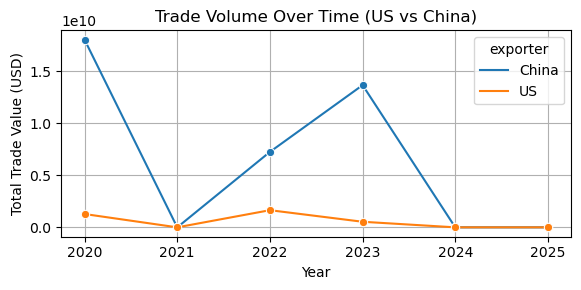

In [109]:
plt.figure(figsize=(6, 3))
sns.lineplot(data=grouped_volume, x='year', y='value_usd', hue='exporter', marker='o')
plt.title("Trade Volume Over Time (US vs China)")
plt.xlabel("Year")
plt.ylabel("Total Trade Value (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [111]:
# 2. Average Tariff Rate Over Time (US vs China)

grouped_tariff = df_clean.groupby(['year', 'exporter'])['mfn_avg_duty'].mean().reset_index()

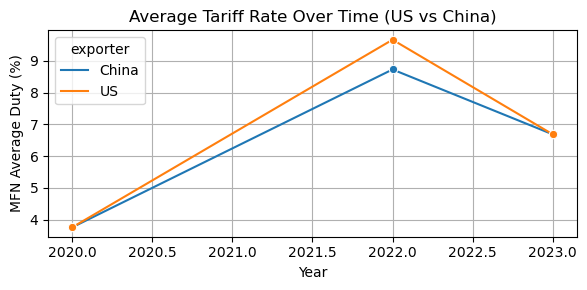

In [113]:
plt.figure(figsize=(6,3))
sns.lineplot(data=grouped_tariff, x='year', y='mfn_avg_duty', hue='exporter', marker='o')
plt.title("Average Tariff Rate Over Time (US vs China)")
plt.xlabel("Year")
plt.ylabel("MFN Average Duty (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [119]:
# 3. Trade with Other Countries (Top 5 Importers by Total Volume)abs

top_importers = df.groupby('importer')['value_usd'].sum().nlargest(5).index
df_top = df[df['importer'].isin(top_importers)]
df_top

,importer,year,value_usd,mfn_avg_duty,best_avg_duty,mfn_line_count,mfn_nonadval_line,pref_line_count,exporter
0,ALL Available Markets,NaN,3.462413e+09,NaN,NaN,NaN,NaN,NaN,US
50,Indonesia,2023.0,4.073950e+08,6.02,6.02,896,4.0,NaN,US
51,Israel,2022.0,1.464401e+09,3.13,3.13,630,10.0,NaN,US
85,Pakistan,2022.0,4.105860e+07,13.15,13.15,498,4.0,NaN,US
115,United Arab Emirates,2020.0,1.277548e+09,3.23,3.23,356,8.0,NaN,US
122,ALL Available Markets,NaN,3.893552e+10,NaN,NaN,NaN,NaN,NaN,China
171,Indonesia,2023.0,1.355633e+10,6.02,6.02,896,4.0,NaN,China
172,Israel,2022.0,4.161141e+09,3.13,3.13,630,10.0,NaN,China
206,Pakistan,2022.0,2.838523e+09,13.15,13.15,498,4.0,NaN,China
236,United Arab Emirates,2020.0,1.787057e+10,3.23,3.23,356,8.0,NaN,China


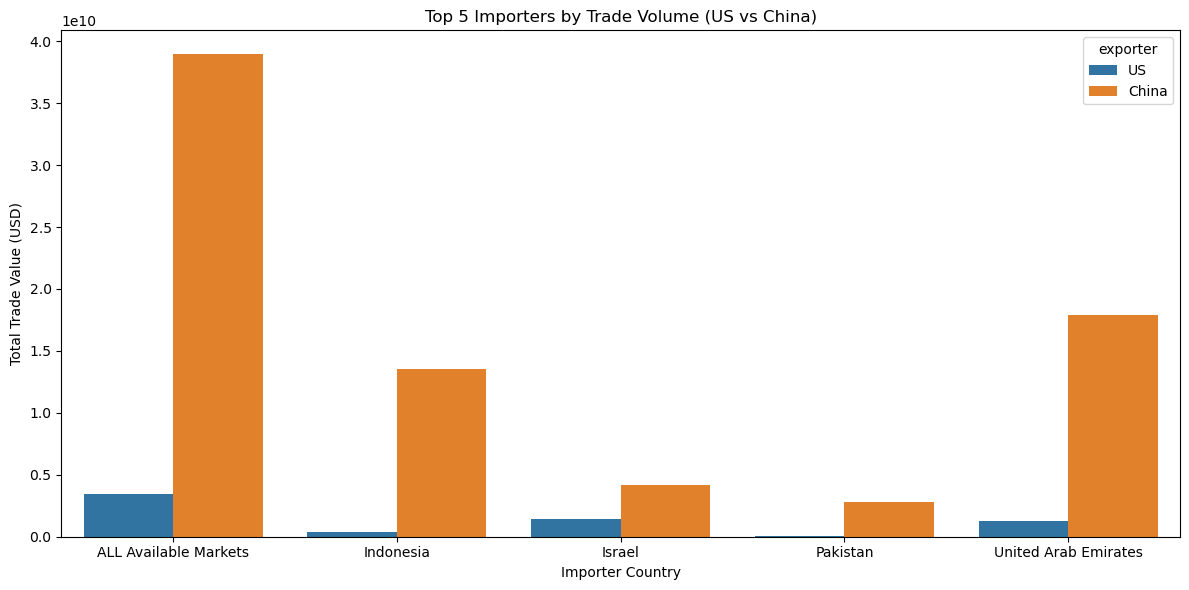

In [121]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top, x='importer', y='value_usd', hue='exporter')
plt.title("Top 5 Importers by Trade Volume (US vs China)")
plt.xlabel("Importer Country")
plt.ylabel("Total Trade Value (USD)")
plt.tight_layout()
plt.show()